# CUSTOMER CHURN ANALYSIS

####The goal is to explore the data in-depth, construct potential features and build a model that can predict the customer churn rate (churn) from the set of features given in the data set

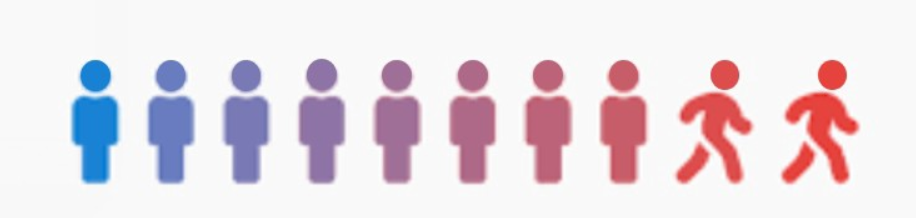

###Import Packages

In [ ]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# pip install imbalanced-learn
from collections import Counter
from numpy import where
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from keras.layers import Dropout
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
import seaborn as sns
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
from keras.callbacks import EarlyStopping

###import data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['data.csv']), sep=';')

In [ ]:
dataset

,row_number,customer_id,credit_score,country,sex,birthdate,tenure,account_balance,number_of_products,has_health_insurance,has_life_insurance,salary_estimated,monthly_fees,churn
0,1,15634602,CreditScore: 619,France,Female,30.07.1979,2,0.00,1,YES,1,101348.88,"87,97103793",1
1,2,15647311,CreditScore: 619,Spain,Female,08.06.2021,1,83807.86,1,0,1,112542.58,"94,31628428",0
2,3,15619304,CreditScore: 619,France,Female,07.06.2021,8,159660.80,3,YES,0,113931.57,"0,869090597",1
3,4,15701354,CreditScore: 619,France,Female,10.06.2021,1,0.00,2,0,0,93826.63,"96,71418566",0
4,5,15737888,CreditScore: 619,Spain,Female,06.06.2021,2,125510.82,1,YES,1,79084.1,"89,88431102",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,CreditScore: 619,France,Male,10.06.2021,5,0.00,2,YES,0,96270.64,"69,35699455",0
9996,9997,15569892,CreditScore: 619,France,Male,14.06.2021,10,57369.61,1,YES,1,101699.77,"75,16762307",0
9997,9998,15584532,CreditScore: 619,France,Female,13.06.2021,7,0.00,1,0,1,42085.58,"48,96097277",1
9998,9999,15682355,CreditScore: 619,Germany,Male,07.06.2021,3,75075.31,2,YES,0,92888.52,"52,06500971",1


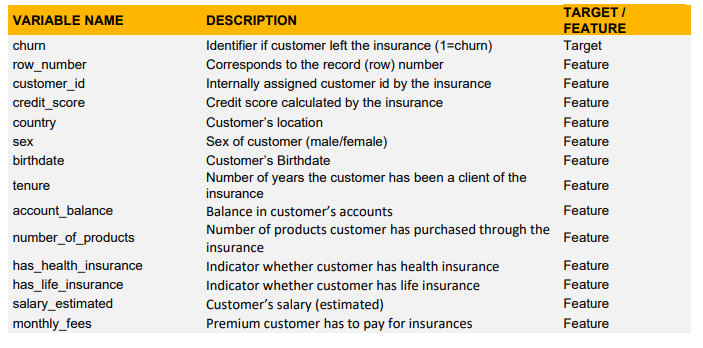

In [ ]:
dataset=dataset.drop(['birthdate','credit_score'],axis=1)

###Data Preprocessing

####Convert Data  Type

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row_number            10000 non-null  int64  
 1   customer_id           10000 non-null  int64  
 2   country               10000 non-null  object 
 3   sex                   10000 non-null  object 
 4   tenure                10000 non-null  int64  
 5   account_balance       10000 non-null  float64
 6   number_of_products    10000 non-null  int64  
 7   has_health_insurance  10000 non-null  object 
 8   has_life_insurance    10000 non-null  int64  
 9   salary_estimated      10000 non-null  object 
 10  monthly_fees          10000 non-null  object 
 11  churn                 10000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 937.6+ KB


In [ ]:
col_to_change=['monthly_fees']

for col in col_to_change:
  dataset[col]=dataset[col].str.replace(',','.')

dataset['monthly_fees'] = pd.to_numeric(dataset['monthly_fees'],errors='coerce')
dataset['monthly_fees'] = dataset['monthly_fees'].astype("float")

In [ ]:
dataset['salary_estimated'] = pd.to_numeric(dataset['salary_estimated'],errors='coerce')
dataset['salary_estimated'] = dataset['salary_estimated'].astype("float")

In [ ]:
mapping={'YES':1}

dataset=dataset.replace({'has_health_insurance': mapping})

dataset['has_health_insurance'] = pd.to_numeric(dataset['has_health_insurance'],errors='coerce')

In [ ]:
dataset

,row_number,customer_id,country,sex,tenure,account_balance,number_of_products,has_health_insurance,has_life_insurance,salary_estimated,monthly_fees,churn
0,1,15634602,France,Female,2,0.00,1,1,1,101348.88,87.971038,1
1,2,15647311,Spain,Female,1,83807.86,1,0,1,112542.58,94.316284,0
2,3,15619304,France,Female,8,159660.80,3,1,0,113931.57,0.869091,1
3,4,15701354,France,Female,1,0.00,2,0,0,93826.63,96.714186,0
4,5,15737888,Spain,Female,2,125510.82,1,1,1,79084.10,89.884311,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,France,Male,5,0.00,2,1,0,96270.64,69.356995,0
9996,9997,15569892,France,Male,10,57369.61,1,1,1,101699.77,75.167623,0
9997,9998,15584532,France,Female,7,0.00,1,0,1,42085.58,48.960973,1
9998,9999,15682355,Germany,Male,3,75075.31,2,1,0,92888.52,52.065010,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row_number            10000 non-null  int64  
 1   customer_id           10000 non-null  int64  
 2   country               10000 non-null  object 
 3   sex                   10000 non-null  object 
 4   tenure                10000 non-null  int64  
 5   account_balance       10000 non-null  float64
 6   number_of_products    10000 non-null  int64  
 7   has_health_insurance  10000 non-null  int64  
 8   has_life_insurance    10000 non-null  int64  
 9   salary_estimated      9999 non-null   float64
 10  monthly_fees          10000 non-null  float64
 11  churn                 10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


#### Check Missing Values 



In [ ]:
dataset.isnull().sum()

row_number              0
customer_id             0
country                 0
sex                     0
tenure                  0
account_balance         0
number_of_products      0
has_health_insurance    0
has_life_insurance      0
salary_estimated        1
monthly_fees            0
churn                   0
dtype: int64

In [ ]:
dataset['salary_estimated']=dataset['salary_estimated'].fillna(dataset['salary_estimated'].mean()).round(0)

In [ ]:
dataset.isna().any()

row_number              False
customer_id             False
country                 False
sex                     False
tenure                  False
account_balance         False
number_of_products      False
has_health_insurance    False
has_life_insurance      False
salary_estimated        False
monthly_fees            False
churn                   False
dtype: bool

####Drop Redundent Columns

In [ ]:
dataset.nunique()

row_number              10000
customer_id             10000
country                     3
sex                         2
tenure                     11
account_balance          6382
number_of_products          4
has_health_insurance        2
has_life_insurance          2
salary_estimated         9761
monthly_fees            10000
churn                       2
dtype: int64

In [ ]:
dataset=dataset.drop(['row_number'],axis=1)  #row_number , and credit_score is useless
dataset

,customer_id,country,sex,tenure,account_balance,number_of_products,has_health_insurance,has_life_insurance,salary_estimated,monthly_fees,churn
0,15634602,France,Female,2,0.00,1,1,1,101349.0,87.971038,1
1,15647311,Spain,Female,1,83807.86,1,0,1,112543.0,94.316284,0
2,15619304,France,Female,8,159660.80,3,1,0,113932.0,0.869091,1
3,15701354,France,Female,1,0.00,2,0,0,93827.0,96.714186,0
4,15737888,Spain,Female,2,125510.82,1,1,1,79084.0,89.884311,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,Male,5,0.00,2,1,0,96271.0,69.356995,0
9996,15569892,France,Male,10,57369.61,1,1,1,101700.0,75.167623,0
9997,15584532,France,Female,7,0.00,1,0,1,42086.0,48.960973,1
9998,15682355,Germany,Male,3,75075.31,2,1,0,92889.0,52.065010,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           10000 non-null  int64  
 1   country               10000 non-null  object 
 2   sex                   10000 non-null  object 
 3   tenure                10000 non-null  int64  
 4   account_balance       10000 non-null  float64
 5   number_of_products    10000 non-null  int64  
 6   has_health_insurance  10000 non-null  int64  
 7   has_life_insurance    10000 non-null  int64  
 8   salary_estimated      10000 non-null  float64
 9   monthly_fees          10000 non-null  float64
 10  churn                 10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


###Exploratory Data Analysis

In [ ]:
# Plot Histogram of numeric Columns--------------------------------------

dataset2 = dataset[['sex', 'tenure', 'account_balance', 'number_of_products',
       'has_health_insurance', 'has_life_insurance', 'salary_estimated',
        'monthly_fees']]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e3dc75690>,
      dtype=object)

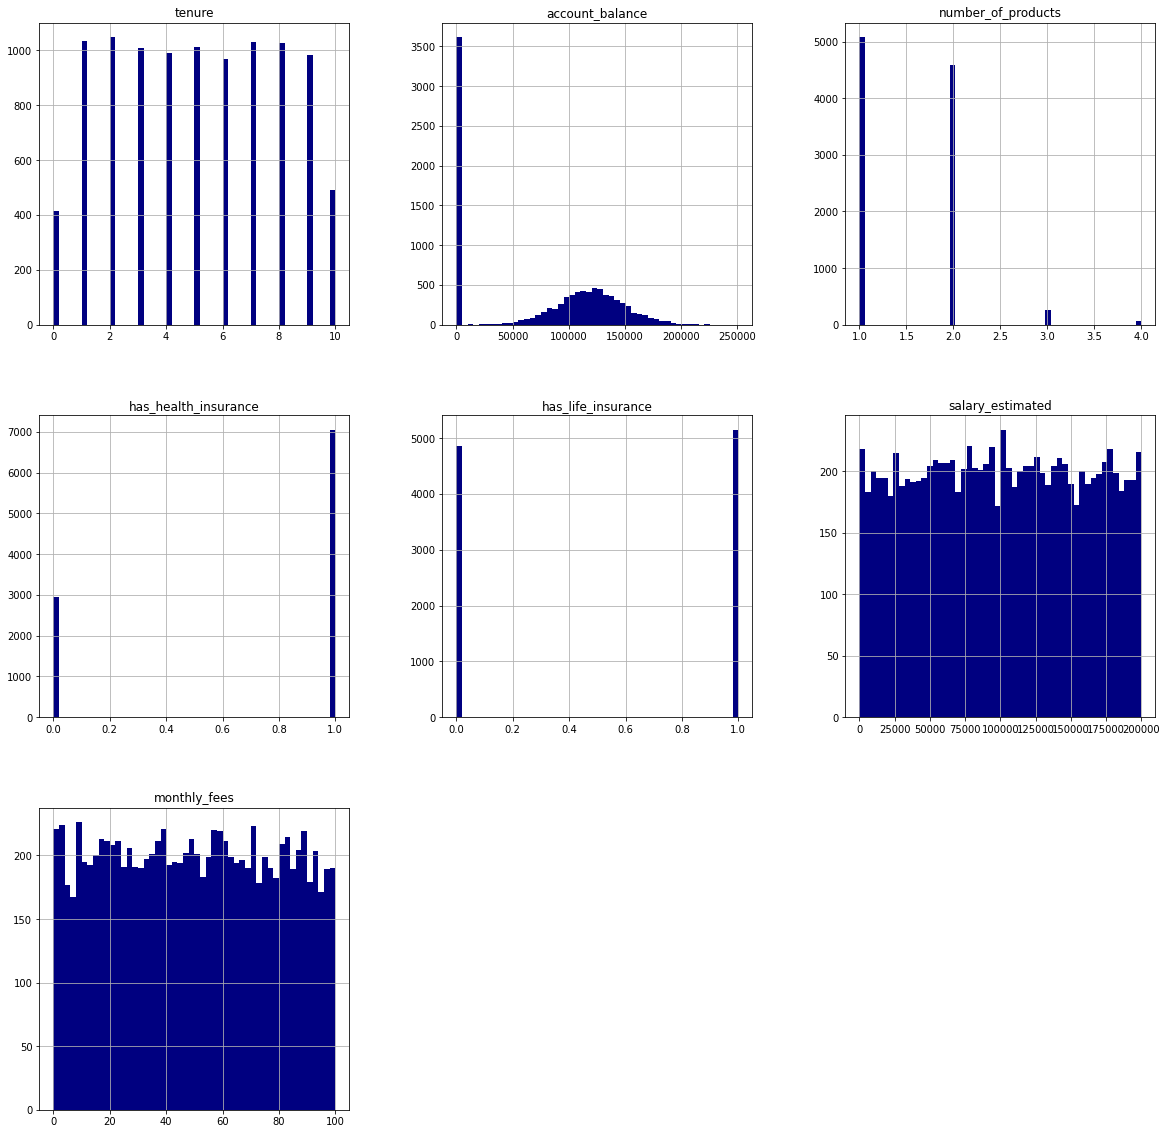

In [ ]:

dataset2.hist(bins=50,figsize=(20,20),color='navy')


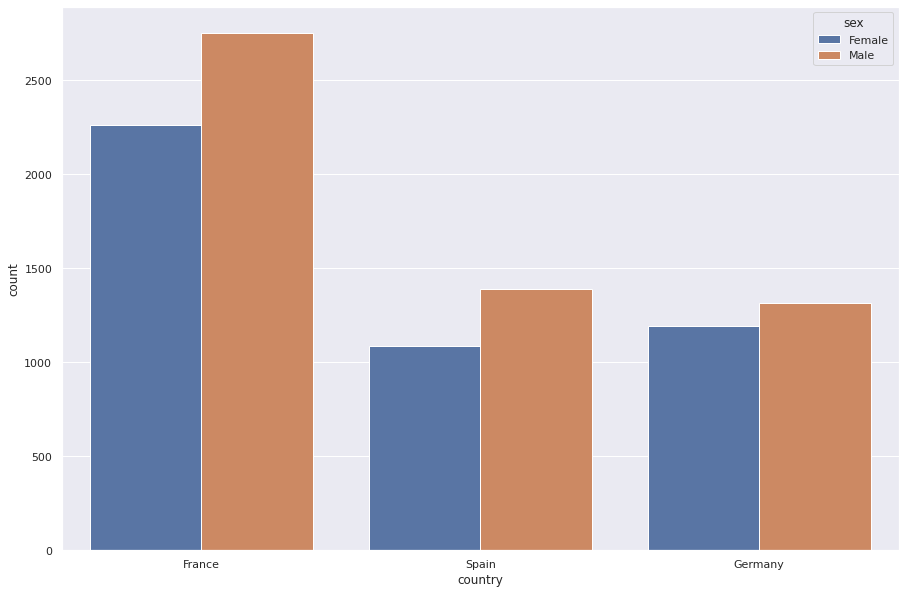

In [ ]:
sns.set_theme(style="darkgrid")
fig, ax = pyplot.subplots(figsize=(15,10))
sns.countplot(x ='country',data = dataset, hue="sex")

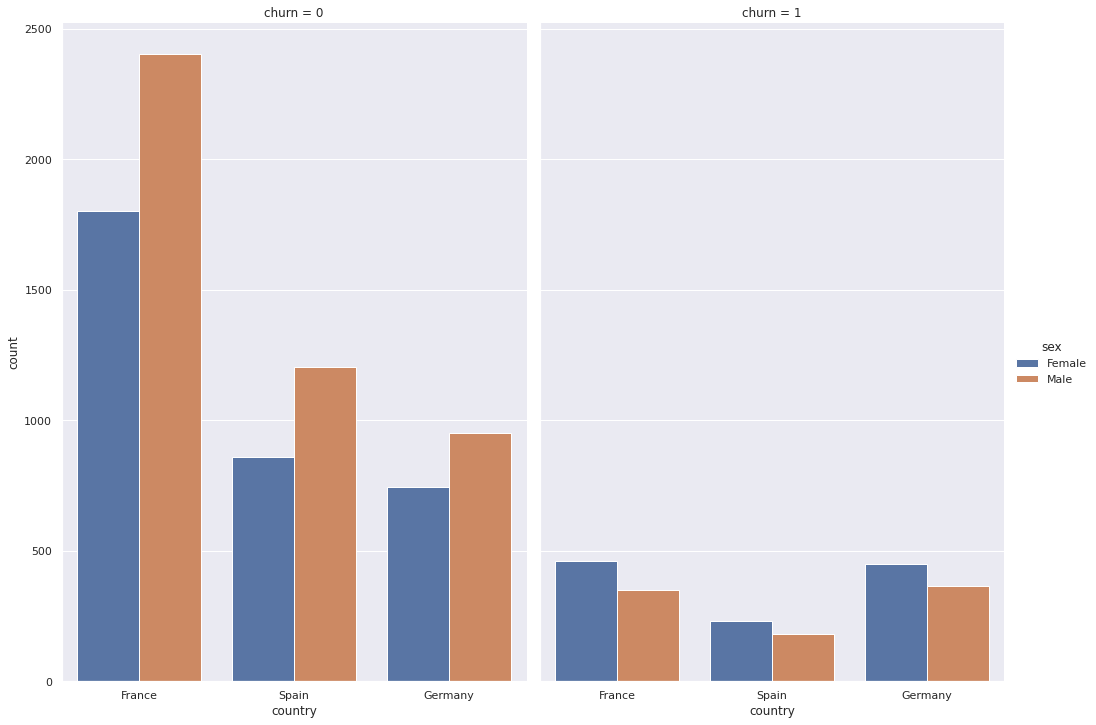

In [ ]:

sns.catplot(x="country", hue="sex", col="churn",
                data=dataset, kind="count",
                height=10, aspect=0.7)


#### Analyze Churn Count by Other Variables

In [ ]:
def facet(data,y):
    g = sns.FacetGrid(data,col = 'churn',size = 5)
    g.map(plt.hist,y,alpha = 0.5)
    g.add_legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


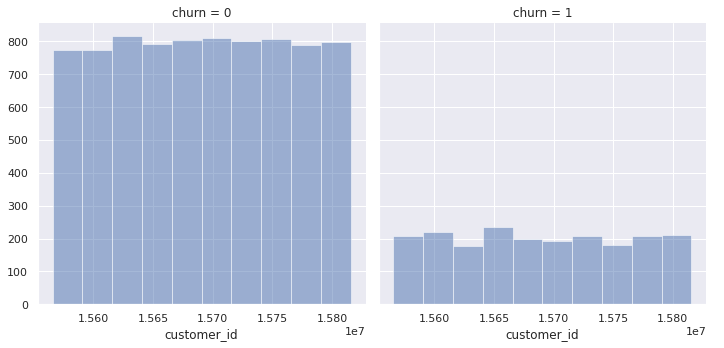

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


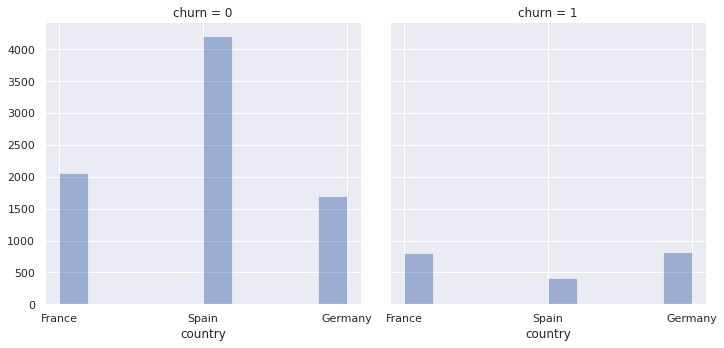

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


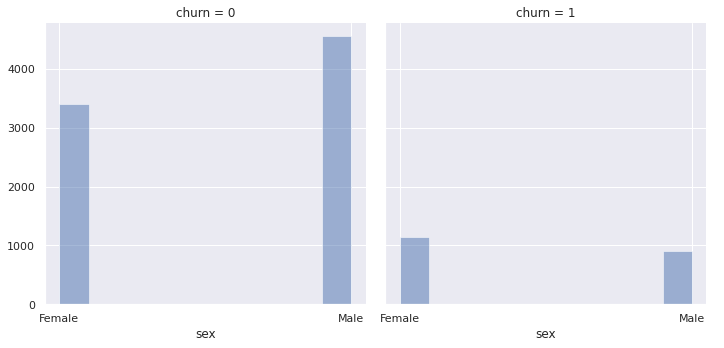

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


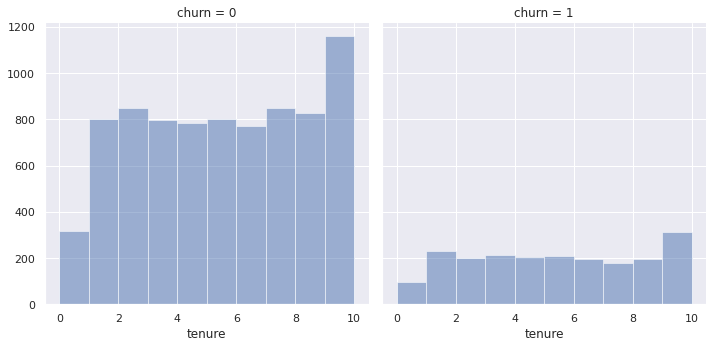

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


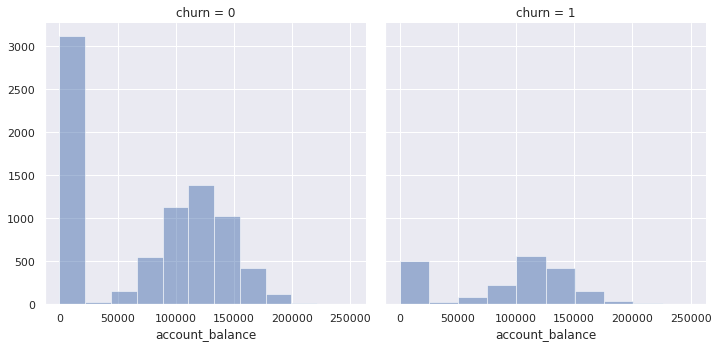

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


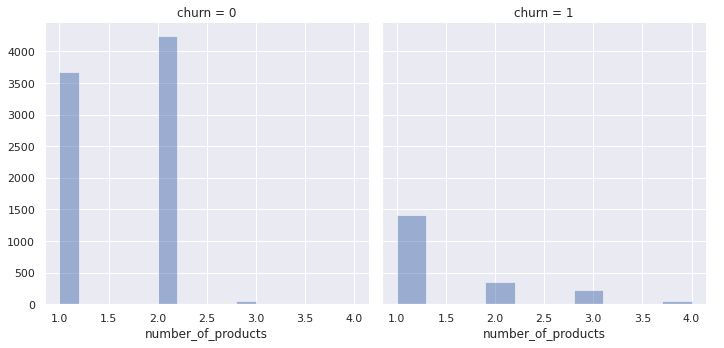

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


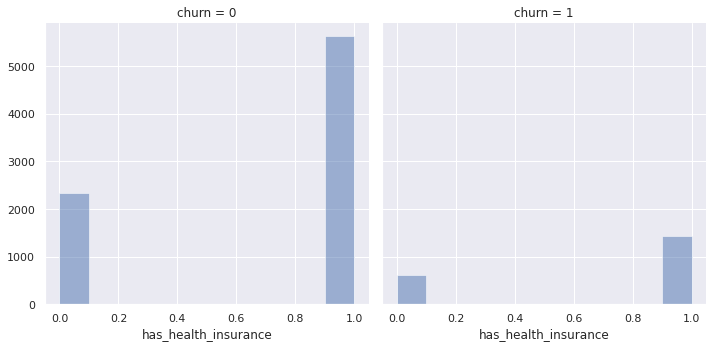

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


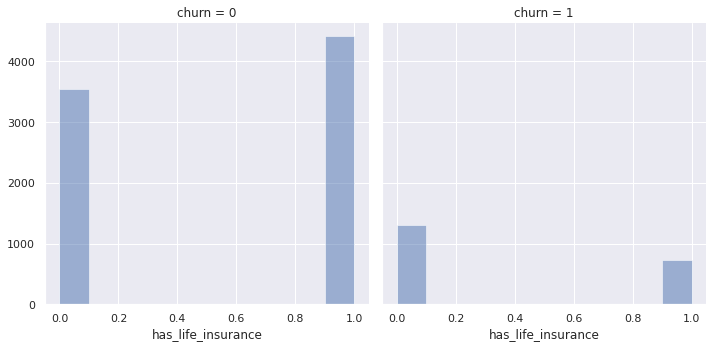

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


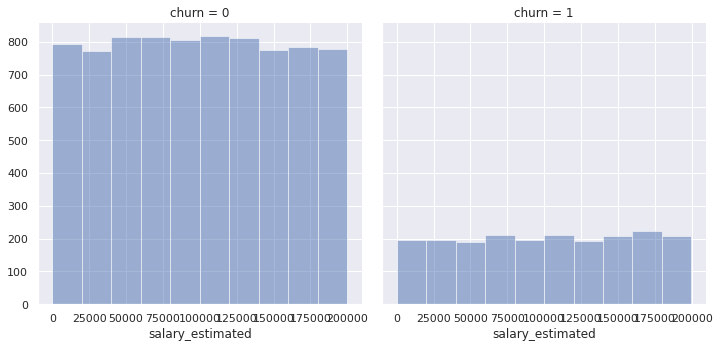

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


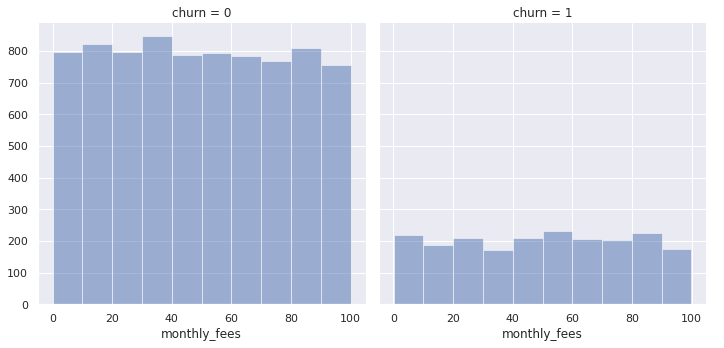

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


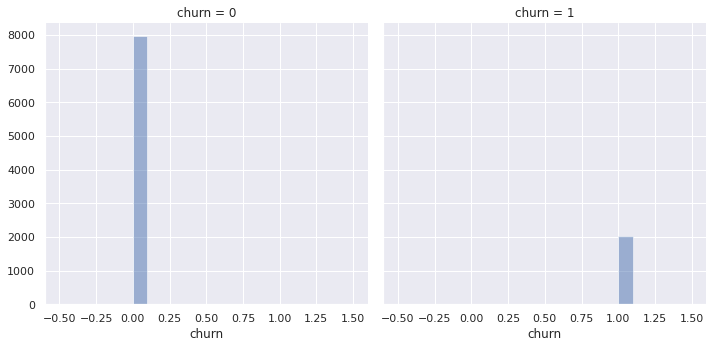

In [ ]:
for col in dataset.columns:
  facet(dataset,col)


#### Analyze Churn Rate by Other Variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


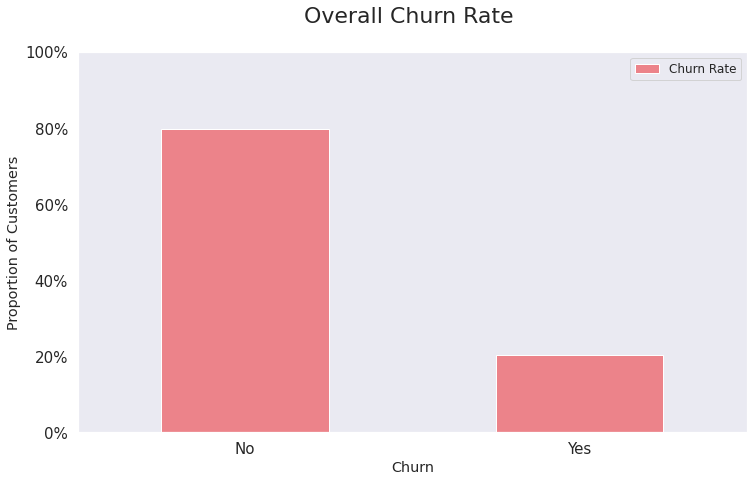

In [ ]:


#(1) Overall Churn Rate------------------------------------------------------------------------------------------

import matplotlib.ticker as mtick
churn_rate = dataset[["churn", "customer_id"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customer_id"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customer_id"] / sum(churn_rate ["customer_id"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, grid = False,  subplots = False
                                          ,  figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customer_id"]])



In [ ]:
def rate_plot(data,col):
  col=str(col)

  varr_churn = dataset.groupby([col,'churn']).size().unstack()
  varr_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
  ax = (varr_churn.T*100.0 / varr_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = ['b','darkred'], alpha= 0.8)

  plt.ylabel('Proportion of Customers\n')
  plt.xlabel(str(col))
  plt.title('Churn Rate by '+str(col))
  plt.legend(loc='top right', fontsize = "medium")
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', color = 'white',
               weight = 'bold',size =14,
             verticalalignment='center')

 

In [ ]:
dataset.nunique()

customer_id             10000
country                     3
sex                         2
tenure                     11
account_balance          6382
number_of_products          4
has_health_insurance        2
has_life_insurance          2
salary_estimated         9761
monthly_fees            10000
churn                       2
dtype: int64

In [ ]:
dataset3 = dataset[['country','sex', 'tenure', 'number_of_products',
       'has_health_insurance', 'has_life_insurance']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


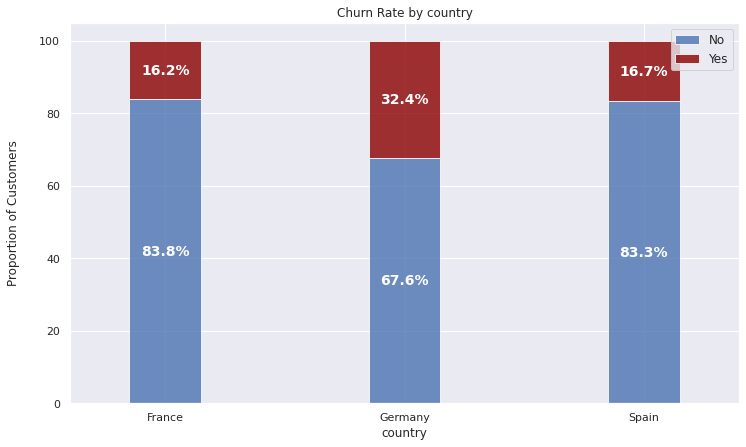

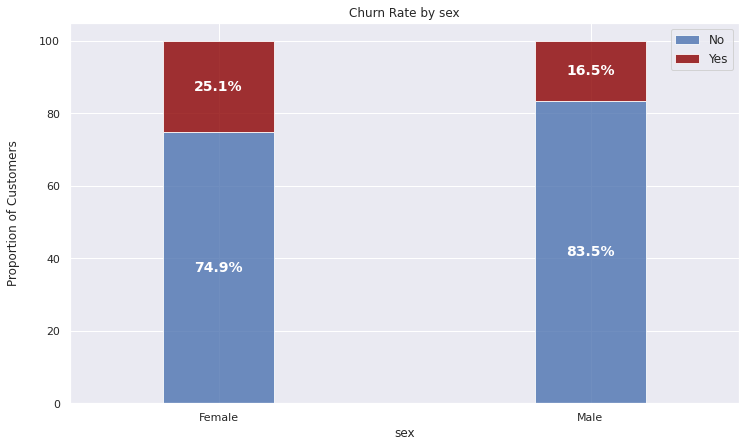

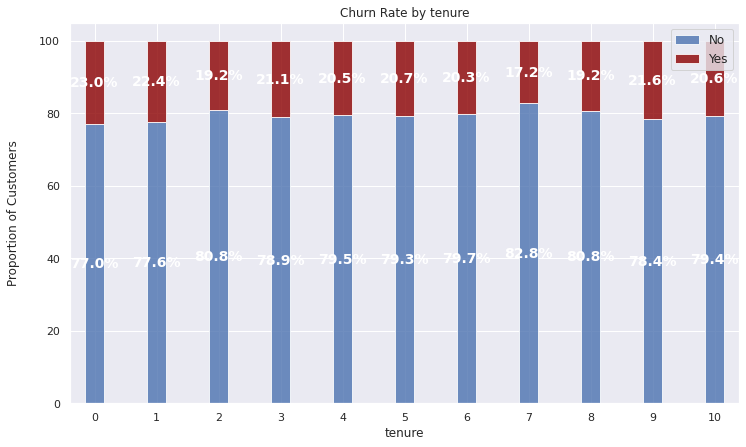

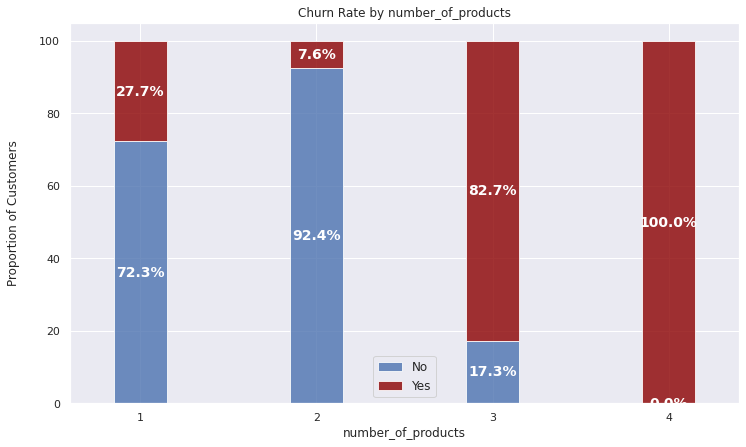

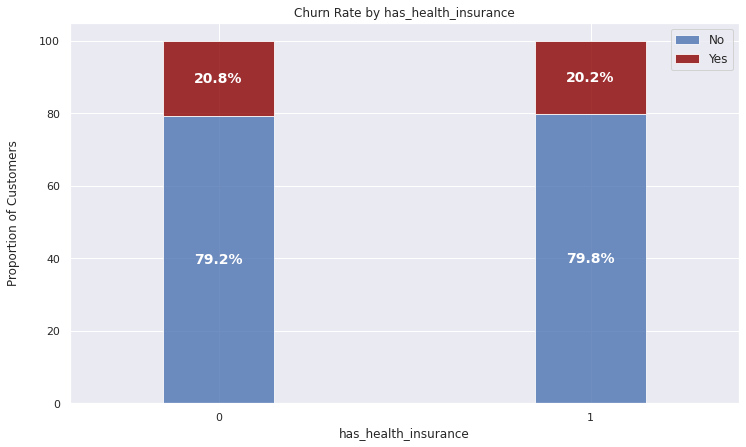

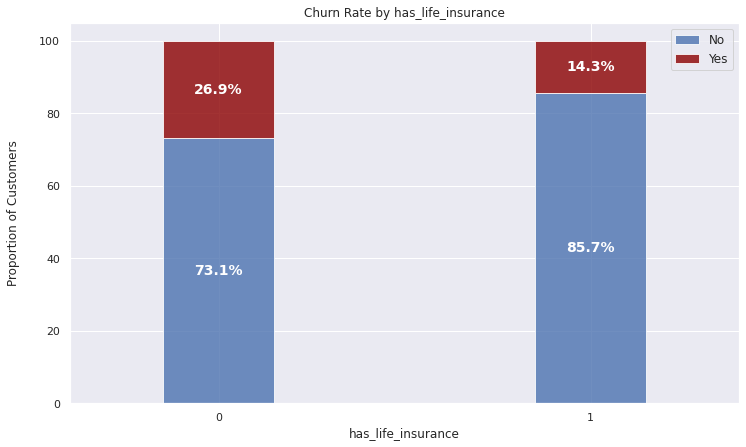

In [ ]:
for col in dataset3.columns:
  rate_plot(dataset.iloc[:,:-1],col)

In [ ]:

dataset['number_of_products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: number_of_products, dtype: int64

In [ ]:
df = dataset

###Categorical Encoding

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [ ]:

dataset = pd.get_dummies(dataset, columns = ['country'])
print(dataset)

      customer_id  sex  tenure  account_balance  number_of_products  \
0        15634602    0       2             0.00                   1   
1        15647311    0       1         83807.86                   1   
2        15619304    0       8        159660.80                   3   
3        15701354    0       1             0.00                   2   
4        15737888    0       2        125510.82                   1   
...           ...  ...     ...              ...                 ...   
9995     15606229    1       5             0.00                   2   
9996     15569892    1      10         57369.61                   1   
9997     15584532    0       7             0.00                   1   
9998     15682355    1       3         75075.31                   2   
9999     15628319    0       4        130142.79                   1   

      has_health_insurance  has_life_insurance  salary_estimated  \
0                        1                   1          101349.0   
1          

### Find positive and negative correlations with the Response Variable



In [ ]:



dataset2=dataset

correlations = dataset2.corrwith(dataset.churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 country_Germany     0.173488
account_balance     0.118533
salary_estimated    0.012443
monthly_fees        0.005051
dtype: float64

Most Negative Correlations: 
 customer_id            -0.006248
has_health_insurance   -0.007138
tenure                 -0.014001
number_of_products     -0.047820
country_Spain          -0.052667
country_France         -0.104955
sex                    -0.106512
has_life_insurance     -0.156128
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

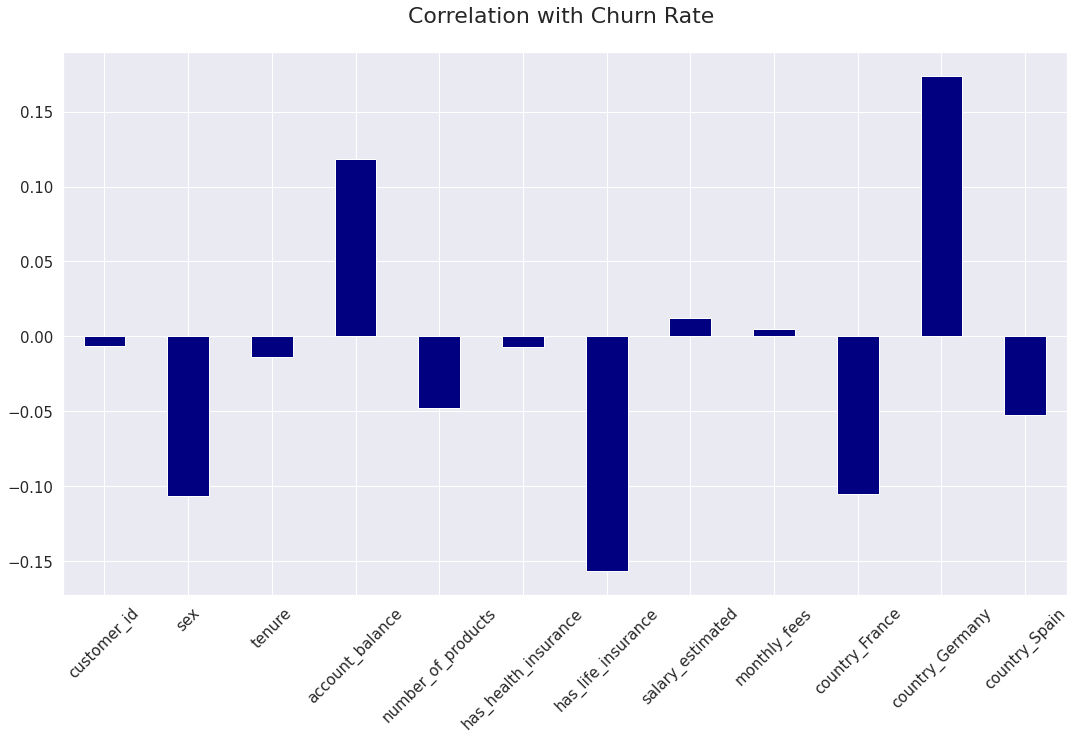

In [ ]:


correlations = dataset2.corrwith(dataset.churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), fontsize = 15, color = 'navy',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

###Split dataset into dependent and independent variables

In [ ]:
target= dataset["churn"]

dataset = dataset.drop(columns="churn")

In [ ]:
dataset = dataset.drop(columns="customer_id")

In [ ]:
col_name=dataset.columns

In [ ]:
dataset.head()

,sex,tenure,account_balance,number_of_products,has_health_insurance,has_life_insurance,salary_estimated,monthly_fees,country_France,country_Germany,country_Spain
0,0,2,0.00,1,1,1,101349.0,87.971038,1,0,0
1,0,1,83807.86,1,0,1,112543.0,94.316284,0,0,1
2,0,8,159660.80,3,1,0,113932.0,0.869091,1,0,0
3,0,1,0.00,2,0,0,93827.0,96.714186,1,0,0
4,0,2,125510.82,1,1,1,79084.0,89.884311,0,0,1


###Generate training and test datasets of dependent and independent variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target,
                                                    stratify=target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print( X_train.shape)
print( y_train.shape)
print( X_test.shape)
print( y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [ ]:
# for XAI use

x_train, x_test, Y_train, Y_test = train_test_split(df, target,
                                                    stratify=target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

x_test_features= x_test.drop('churn', axis=1).values
x_test_labels = x_test['churn'].values.astype(int)
x_test_featuress= x_test.drop('churn', axis=1)

###Feature Selection

In [ ]:
X_train=pd.DataFrame(X_train,columns=col_name)

In [ ]:
X_test=pd.DataFrame(X_test,columns=col_name)

In [ ]:
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k=8) 
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

Feature 0: 0.013185
Feature 1: 0.001876
Feature 2: 0.003614
Feature 3: 0.072848
Feature 4: 0.000000
Feature 5: 0.012775
Feature 6: 0.008685
Feature 7: 0.001226
Feature 8: 0.000872
Feature 9: 0.014943
Feature 10: 0.004687


<BarContainer object of 11 artists>

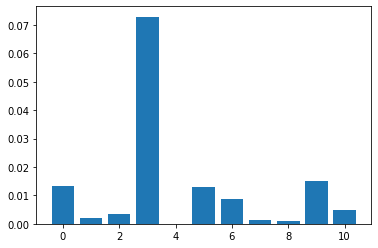

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)

In [ ]:
X_train_fs.shape,X_test_fs.shape

((8000, 8), (2000, 8))

In [ ]:
X_train=X_train_fs
X_test=X_test_fs

###Feature Scaling

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
# X_train2.columns = X_train.columns.values
# X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
# X_test2.columns = X_test.columns.values
# X_test2.index = X_test.index.values
X_test = X_test2

###Model Selection- Compare Baseline Classification Algorithms - First Iteration

In [ ]:

#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('Xboost', XGBClassifier()))


models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



def nn():
  network = Sequential()
  network.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
  network.add(Dense(8, activation='relu'))
  network.add(Dense(1, activation='sigmoid'))

  network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = network.fit(X_train, y_train, epochs=25, batch_size=32)
  return network

clf = KerasClassifier(build_fn=nn, verbose=0)


models.append(('MLP',clf))

#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=5, random_state=0)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: Fit

Epoch 1/25
250/250 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 2/25
250/250 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7962
Epoch 4/25
250/250 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 5/25
250/250 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 6/25
250/250 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 7/25
250/250 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 8/25
250/250 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 9/25
250/250 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 10/25
250/250 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7962
Epoch 11/25
250/250 [========

ValueError: ignored

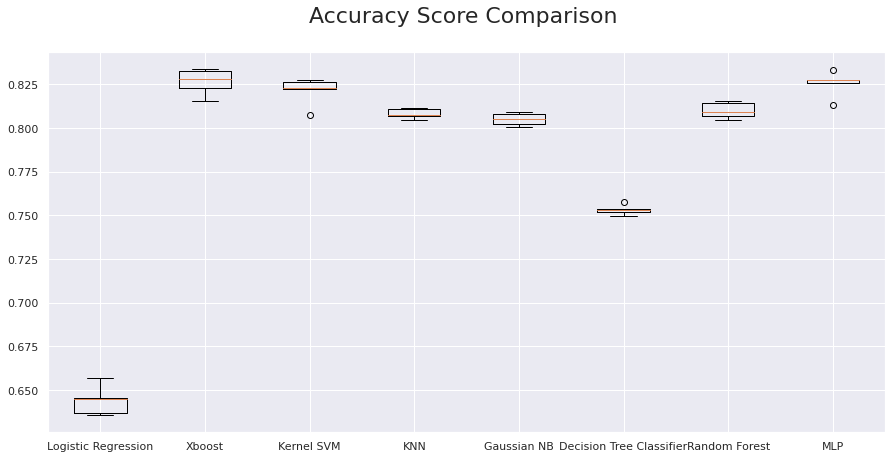

In [ ]:
#Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------

  
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

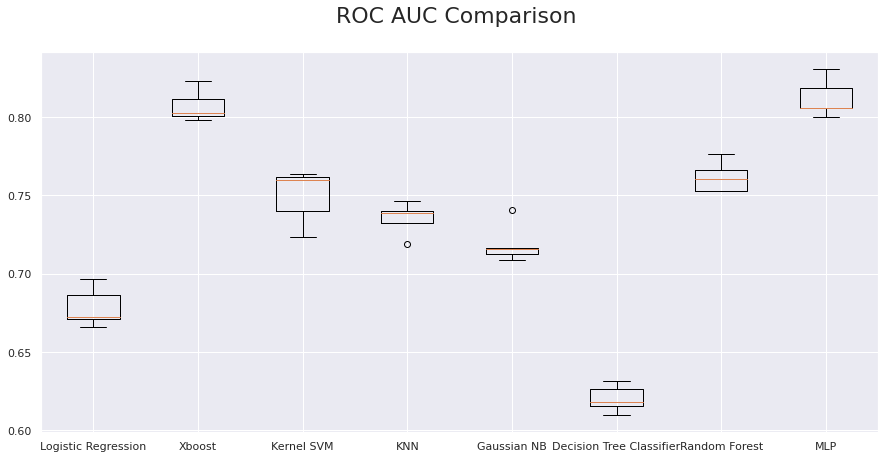

In [ ]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

## Get the right hyperparameters

###Tune MLP ,XBoost,SVM and RandomForest


####XBoost

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='roc_auc',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
model_XGBoost = XGBClassifier()
param_grid = {
    'n_estimators': [20,30,40,50],
    # 'colsample_bytree': [0.7, 0.8],
    'max_depth': [3,4,5,10],
    # 'reg_alpha': [1.1, 1.2, 1.3],
    # 'reg_lambda': [1.1, 1.2, 1.3],
    # 'subsample': [0.7, 0.8, 0.9]
}

model_XGBoost, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model_XGBoost, 
                                 param_grid, cv=5)
print(model_XGBoost.best_score_)
print(model_XGBoost.best_params_)
print(model_XGBoost.best_estimator_)

grid_predict=model_XGBoost.predict(X_test)
print(classification_report(y_test, grid_predict))
acc_XGBoost = accuracy_score(y_test,  grid_predict)
prec_XGBoost = precision_score(y_test,  grid_predict )
rec_XGBoost = recall_score(y_test, grid_predict )
f1_XGBoost = f1_score(y_test, grid_predict )
f2_XGBoost = fbeta_score(y_test,  grid_predict, beta=2.0)
  

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.5s


0.809879756527434
{'max_depth': 4, 'n_estimators': 30}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.71      0.29      0.41       407

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.3s finished


####SVM

In [ ]:
model_SVM=SVC()
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

model_SVM, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model_SVM, 
                                 param_grid, cv=5)
print(model_SVM.best_score_)
print(model_SVM.best_params_)
print(model_SVM.best_estimator_)

grid_predict_SVM=model_SVM.predict(X_test)
print(classification_report(y_test, grid_predict_SVM))
acc_SVM = accuracy_score(y_test,  grid_predict_SVM)
prec_SVM = precision_score(y_test,  grid_predict_SVM )
rec_SVM = recall_score(y_test, grid_predict_SVM )
f1_SVM = f1_score(y_test, grid_predict_SVM )
f2_SVM = fbeta_score(y_test,  grid_predict_SVM, beta=2.0)
  

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


0.7656485057449125
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1593
           1       0.87      0.13      0.22       407

    accuracy                           0.82      2000
   macro avg       0.84      0.56      0.56      2000
weighted avg       0.83      0.82      0.76      2000



####RandomForest

In [ ]:

model_RandomForest=RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,5,7],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [20, 50, 100, 150]
}
model_RandomForest, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model_RandomForest, 
                                 param_grid, cv=5)
print(model_RandomForest.best_score_)
print(model_RandomForest.best_params_)
print(model_RandomForest.best_estimator_)

grid_predict_RandomForest=model_RandomForest.predict(X_test)
print(classification_report(y_test, grid_predict_RandomForest))
acc_RandomForest= accuracy_score(y_test,  grid_predict_RandomForest)
prec_RandomForest = precision_score(y_test,  grid_predict_RandomForest )
rec_RandomForest = recall_score(y_test, grid_predict_RandomForest )
f1_RandomForest = f1_score(y_test, grid_predict_RandomForest )
f2_RandomForest= fbeta_score(y_test,  grid_predict_RandomForest, beta=2.0)
  






Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1179 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1624 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  8.4min finished


0.8106326626922595
{'bootstrap': True, 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1593
           1       0.76      0.25      0.38       407

    accuracy                           0.83      2000
   macro avg       0.80      0.61      0.64      2000
weighted avg       0.82      0.83      0.80    

####MLP

In [ ]:
def ANN(optimizer = 'adam',neurons1=32,neurons2=32,neurons3=32,neurons4=32,batch_size=32,epochs=20,activation='relu',
        patience=3,loss='binary_crossentropy'):
    model_MLP = Sequential()
    model_MLP.add(Dense(neurons1,input_dim=X_train.shape[1], activation=activation))
    model_MLP.add(Dense(neurons2, activation=activation))
    model_MLP.add(Dense(neurons3,activation=activation))
    model_MLP.add(Dense(neurons4,activation=activation))

    model_MLP.add(Dense(1,activation='sigmoid'))  
    model_MLP.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor='binary_crossentropy', patience = 3)# early stop patience
    history = model_MLP.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) 
    return model_MLP


In [ ]:
model_MLP=KerasClassifier(build_fn=ANN,verbose=0)

param_grid ={
    'activation': ['relu','tanh','logistic'],
    'neurons1':[30,40,50],
    'neurons2':[30,40,50],
    'neurons3':[30,40,50],
    'neurons4':[30,40,50],
   
    
}

model_MLP, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model_MLP, 
                                 param_grid, cv=5)
print(model_MLP.best_score_)
print(model_MLP.best_params_)
print(model_MLP.best_estimator_)

grid_predict_MLP=model_MLP.predict(X_test)

grid_predict_MLP = [round(x[0]) for x in model_MLP.predict(X_test)]
print(classification_report(y_test, grid_predict_MLP))
acc_MLP= accuracy_score(y_test,  grid_predict_MLP)
prec_RMLP = precision_score(y_test,  grid_predict_MLP )
rec_MLP = recall_score(y_test, grid_predict_MLP )
f1_MLP = f1_score(y_test, grid_predict_MLP)
f2_MLP= fbeta_score(y_test,  grid_predict_MLP, beta=2.0)
  


In [ ]:
model_MLP = Sequential()
model_MLP.add(Dense(50,input_dim=X_train.shape[1], activation='relu'))
# model_MLP.add(Dropout(.2))
model_MLP.add(Dense(70, activation='relu',kernel_regularizer='l2'))
# model_MLP.add(Dropout(.2))
model_MLP.add(Dense(50,activation='relu'))
# model_MLP.add(Dropout(.2))
# model_MLP.add(Dense(100,activation='relu'))
# model_MLP.add(Dropout(.2))
# model_MLP.add(Dense(20,activation='relu'))
# model_MLP.add(Dropout(.2))
model_MLP.add(Dense(1,activation='sigmoid'))  
model_MLP.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

history = model_MLP.fit(X_train, y_train,batch_size=32,epochs=100,verbose=1) 

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6840 - accuracy: 0.8025
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8227
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8216
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8225
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8227
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8223
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8274
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8246
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8256
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3993 - accura

In [ ]:
train_set_preds = [round(x[0]) for x in model_MLP.predict(X_train)]
test_set_preds = [round(x[0]) for x in model_MLP.predict(X_test)]

In [ ]:
grid_predict_MLP = [round(x[0]) for x in model_MLP.predict(X_test)]
print(classification_report(y_test, grid_predict_MLP))
acc_MLP= accuracy_score(y_test,  grid_predict_MLP)
prec_MLP = precision_score(y_test,  grid_predict_MLP )
rec_MLP = recall_score(y_test, grid_predict_MLP )
f1_MLP = f1_score(y_test, grid_predict_MLP)
f2_MLP= fbeta_score(y_test,  grid_predict_MLP, beta=2.0)
  

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1593
           1       0.61      0.36      0.45       407

    accuracy                           0.82      2000
   macro avg       0.73      0.65      0.67      2000
weighted avg       0.80      0.82      0.81      2000





```
# This is formatted as code
```

###Result Comparison

In [ ]:
dic4={"acc":[("{:.2f}".format(acc_MLP)),("{:.2f}".format(acc_SVM)),("{:.2f}".format(acc_XGBoost)), ("{:.2f}".format(acc_RandomForest))],
      
      "precision":[("{:.2f}".format(prec_MLP)),("{:.2f}".format(prec_SVM)),("{:.2f}".format(prec_XGBoost)), ("{:.2f}".format(prec_RandomForest))],
      
      "recall":[("{:.2f}".format(rec_MLP)),("{:.2f}".format(rec_SVM)),("{:.2f}".format(rec_XGBoost)), ("{:.2f}".format(rec_RandomForest))],

      "f1_score":[("{:.2f}".format(f1_MLP)),("{:.2f}".format(f1_SVM)),("{:.2f}".format(f1_XGBoost)), ("{:.2f}".format(f1_RandomForest))],

      "f2_score":[("{:.2f}".format(f2_MLP)),("{:.2f}".format(f2_SVM)),("{:.2f}".format(f2_XGBoost)), ("{:.2f}".format(f2_RandomForest))],
      }
main_data3=pd.DataFrame.from_dict( dic4 , orient='index')#,index=['SIMPLE RNN','LSTM MODEL','GRU MODEL','SVR MODEL','SARIMAX MODEL'],
                                 #columns=["MSE","MAE"] )
main_data3.columns=['MLP','SVM','XGBoost','RandomForest']
main_data3 = main_data3.T
main_data3

,acc,precision,recall,f1_score,f2_score
MLP,0.82,0.61,0.36,0.45,0.39
SVM,0.82,0.87,0.13,0.22,0.15
XGBoost,0.83,0.71,0.29,0.41,0.33
RandomForest,0.83,0.76,0.25,0.38,0.29


Text(0.5, 1.0, 'Accuracy')

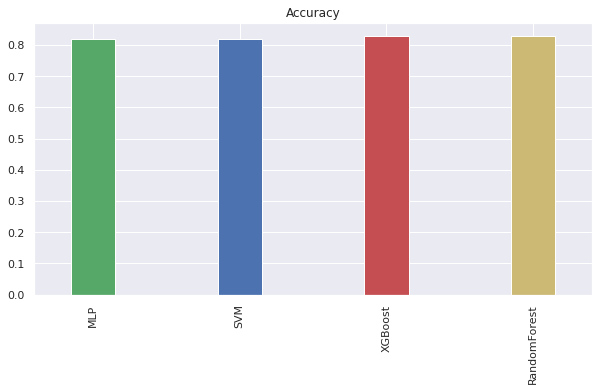

In [ ]:
plt.figure(figsize=(10,5))
main_data3["acc"]=main_data3["acc"].astype(float)
main_data3["acc"].plot(kind="bar", grid=True , color=tuple(["g", "b","r","y","k"]) , width=0.3)
plt.title("Accuracy")


### model Selected

In [ ]:
model_XGBoost = XGBClassifier()
param_grid = {
    'n_estimators': [20,30,40,50],
    # 'colsample_bytree': [0.7, 0.8],
    'max_depth': [3,4,5,10],
    # 'reg_alpha': [1.1, 1.2, 1.3],
    # 'reg_lambda': [1.1, 1.2, 1.3],
    # 'subsample': [0.7, 0.8, 0.9]
}

model_XGBoost, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model_XGBoost, 
                                 param_grid, cv=5)
print(model_XGBoost.best_score_)
print(model_XGBoost.best_params_)
print(model_XGBoost.best_estimator_)

grid_predict=model_XGBoost.predict(X_test)
print(classification_report(y_test, grid_predict))
acc_XGBoost = accuracy_score(y_test,  grid_predict)
prec_XGBoost = precision_score(y_test,  grid_predict )
rec_XGBoost = recall_score(y_test, grid_predict )
f1_XGBoost = f1_score(y_test, grid_predict )
f2_XGBoost = fbeta_score(y_test,  grid_predict, beta=2.0)
  

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.6s


0.8097689996243898
{'max_depth': 4, 'n_estimators': 30}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.72      0.28      0.41       407

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.65      2000
weighted avg       0.82      0.83      0.80      2000



[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.2s finished


## confusion matrix

Text(0.5, 7.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

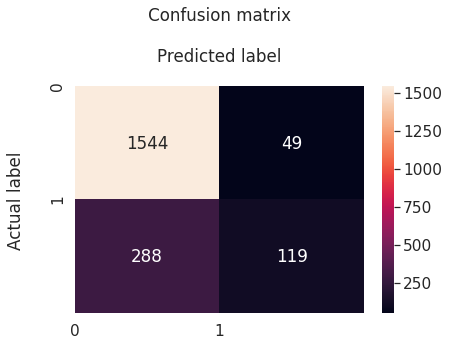

In [ ]:


cm = confusion_matrix(y_test, grid_predict) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="OrRd" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')


##Explainable AI

###What-If Tool

In [ ]:
import pickle

In [ ]:
with open ('model.pkl', 'wb')as model_file:
    pickle.dump(model_XGBoost , model_file)

In [ ]:
!gsutil mb gs://accenture-sample-project

Creating gs://accenture-sample-project/...
You are attempting to perform an operation that requires a project id, with none configured. Please re-run gsutil config and make sure to follow the instructions for finding and entering your default project id.


In [ ]:
num_datapoints = 2000

test_examples = np.hstack(
    (X_test_features[:num_datapoints],
    X_test_labels[:num_datapoints].reshape(-1,1)
)
)

NameError: ignored

In [ ]:
!pip install witwidget

In [ ]:
import witwidget
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/vanos/Desktop/Sheida/interviews/Accenture/accenture-325718-000da9a63c5c.json"

In [ ]:
def adjust_prediction(pred):
  return [1 - pred, pred]

config_builder = (WitConfigBuilder(test_examples.tolist() , X_test_featuress.columns.tolist()+ ['churn'])
  .set_ai_platform_model('accenture-sample-project', 'model_XGBoost', 'v1', adjust_prediction= adjust_prediction)
  .set_target_feature('churn')
  .set_label_vocab(['Yes','No']))
                  
                  
WitWidget(config_builder, height=800)

NameError: ignored